# 1) Extract reviews of any product from ecommerce website like amazon
# 2) Perform emotion mining 

# Web Scrapping(Extract reviews)

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models
from bs4 import BeautifulSoup as bs
import requests

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [2]:
link='https://www.amazon.in/OnePlus-Mirror-Black-128GB-Storage/product-reviews/B07DJHV6VZ/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews'

In [3]:
page=requests.get(link)
page

<Response [200]>

In [4]:
soup=bs(page.content,"html.parser")

In [5]:
print(soup.prettify())

<!DOCTYPE html>
<html class="a-no-js" data-19ax5a9jf="dingo" lang="en-in">
 <!-- sp:feature:head-start -->
 <head>
  <script>
   var aPageStart = (new Date()).getTime();
  </script>
  <meta charset="utf-8"/>
  <!-- sp:end-feature:head-start -->
  <!-- sp:feature:cs-optimization -->
  <meta content="on" http-equiv="x-dns-prefetch-control"/>
  <link href="https://images-eu.ssl-images-amazon.com" rel="dns-prefetch"/>
  <link href="https://m.media-amazon.com" rel="dns-prefetch"/>
  <link href="https://completion.amazon.com" rel="dns-prefetch"/>
  <!-- sp:end-feature:cs-optimization -->
  <!-- sp:feature:aui-assets -->
  <link href="https://images-eu.ssl-images-amazon.com/images/I/11EIQ5IGqaL._RC|01ZTHTZObnL.css,41C-I1lXVwL.css,31ufSReDtSL.css,013z33uKh2L.css,017DsKjNQJL.css,0131vqwP5UL.css,41EWOOlBJ9L.css,11TIuySqr6L.css,01ElnPiDxWL.css,11Qjwq-j69L.css,01Dm5eKVxwL.css,01IdKcBuAdL.css,01y-XAlI+2L.css,21P6CS3L9LL.css,01oDR3IULNL.css,41CYNGpGlrL.css,01XPHJk60-L.css,01smHc51S9L.css,21aPhFy+riL

In [6]:
reviwe=soup.find_all("span",{"data-hook":"review-body"})
reviwe

[<span class="a-size-base review-text review-text-content" data-hook="review-body">
 <span>I got this phone on Friday evening.<br/><br/>Pros:<br/>Great battery life<br/>Amazing performance<br/>Premium design<br/>Impressive rear and front camera<br/>In display fingerprint scanner is really fast<br/><br/>Cons:<br/>No headphone jack but you'll get a converter<br/>No notification LED<br/>No microSD card slot<br/><br/>I will give points on my personal experience of 2 days full usage as below:<br/><br/>Weight: 9/10<br/>OS: 10/10<br/>Screen size: 10/10<br/>CPU: 10/10<br/>Performance: 10/10<br/>Storage: 10/10 (you'll get approx 113 gb for use)<br/>Battery: 8/10<br/>Rear camera: 10/10<br/>Front camera: 10/10<br/>In display fingerprint scanner: 9/10<br/>Face unlock: 10/10<br/><br/>I hope this will help full.</span>
 </span>,
 <span class="a-size-base review-text review-text-content" data-hook="review-body">
 <span>Camera quality is not upto the mark. I visited one plus store and the store repres

In [7]:
review_content=[]
for i in range(0,len(reviwe)):
    review_content.append(reviwe[i].get_text())
review_content    

["\nI got this phone on Friday evening.Pros:Great battery lifeAmazing performancePremium designImpressive rear and front cameraIn display fingerprint scanner is really fastCons:No headphone jack but you'll get a converterNo notification LEDNo microSD card slotI will give points on my personal experience of 2 days full usage as below:Weight: 9/10OS: 10/10Screen size: 10/10CPU: 10/10Performance: 10/10Storage: 10/10 (you'll get approx 113 gb for use)Battery: 8/10Rear camera: 10/10Front camera: 10/10In display fingerprint scanner: 9/10Face unlock: 10/10I hope this will help full.\n",
 '\nCamera quality is not upto the mark. I visited one plus store and the store representative checked my phone and compared the camera quality with his demo phone. He noticed a significant difference between the two.I request Amazon to replace my phone with a new one as it is evident that this phone has some problems.\n',
 "\nI charged the phone completely out of the box and then turned it on.  It went to the

In [8]:
review_content[:]=[review.lstrip('\n') for review in review_content]
review_content

["I got this phone on Friday evening.Pros:Great battery lifeAmazing performancePremium designImpressive rear and front cameraIn display fingerprint scanner is really fastCons:No headphone jack but you'll get a converterNo notification LEDNo microSD card slotI will give points on my personal experience of 2 days full usage as below:Weight: 9/10OS: 10/10Screen size: 10/10CPU: 10/10Performance: 10/10Storage: 10/10 (you'll get approx 113 gb for use)Battery: 8/10Rear camera: 10/10Front camera: 10/10In display fingerprint scanner: 9/10Face unlock: 10/10I hope this will help full.\n",
 'Camera quality is not upto the mark. I visited one plus store and the store representative checked my phone and compared the camera quality with his demo phone. He noticed a significant difference between the two.I request Amazon to replace my phone with a new one as it is evident that this phone has some problems.\n',
 "I charged the phone completely out of the box and then turned it on.  It went to the Onepl

In [9]:
review_content[:]=[review.rstrip('\n') for review in review_content]
review_content

["I got this phone on Friday evening.Pros:Great battery lifeAmazing performancePremium designImpressive rear and front cameraIn display fingerprint scanner is really fastCons:No headphone jack but you'll get a converterNo notification LEDNo microSD card slotI will give points on my personal experience of 2 days full usage as below:Weight: 9/10OS: 10/10Screen size: 10/10CPU: 10/10Performance: 10/10Storage: 10/10 (you'll get approx 113 gb for use)Battery: 8/10Rear camera: 10/10Front camera: 10/10In display fingerprint scanner: 9/10Face unlock: 10/10I hope this will help full.",
 'Camera quality is not upto the mark. I visited one plus store and the store representative checked my phone and compared the camera quality with his demo phone. He noticed a significant difference between the two.I request Amazon to replace my phone with a new one as it is evident that this phone has some problems.',
 "I charged the phone completely out of the box and then turned it on.  It went to the Oneplus l

In [10]:
df=pd.DataFrame()

In [11]:
df['x']=review_content

In [12]:
df.to_csv(r'C:\Users\shash\Desktop\reviews.txt', header=None, index=None, sep='\t', mode='a')

# Emotion Mining 

In [13]:
import pandas
reviews=pd.read_csv("reviews.txt",error_bad_lines=False)
reviews

C:\Users\shash\AppData\Local\Temp\ipykernel_16800\3525623993.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  reviews=pd.read_csv("reviews.txt",error_bad_lines=False)
b'Skipping line 6: expected 1 fields, saw 14\n'


,x
0,It's amazing..... battery last around 10 -12 h...
1,Finally a MacBook possession. Got it in 50k in...
2,Best Laptop under 60k. If you don't want any a...
3,Pros:1. Light weight and super fast response t...
4,""""
5,I am very upset about the product as I checked...
6,Reason for 1 star is I ot an defective piece. ...
7,Got the Apple Macbook air on amazon discount s...
8,White line coming on screen in just three mont...
9,"Bought this product recently on 5 April, was w..."


In [14]:
reviews = [x.strip() for x in reviews.x] # remove both the leading and the trailing characters
reviews = [x for x in reviews if x] # removes empty strings, because they are considered in Python as False
reviews[0:10]

["It's amazing..... battery last around 10 -12 hrs.....best laptop for students and coders",
 "Finally a MacBook possession. Got it in 50k in Diwali sale. Technically good laptop.Good News.luxury product, niche technology, good battery life, reliable machine (other laptops crash and become defunct in 6-10 years), no anti-virus required, security of data and transactions much better. Terrific sense of possession & pride.Bad News. Problems will be there if you are switching from windows based system - very less space in hard disk, no CD drive, inability to transfer data from Mac to your existing external hard disc unless you format it, apps are mostly paid and re unreasonably expensive (no free apps which are available otherwise on google play store, even the angry bird costs Rs 400 !!), all printers are not compatible (e.g. the most economical MFD laser printer RICOH SP 111 can't be used), huge compatibility issues with Pages (MS Word) and Keynote (powerpoint) unless you master it by wo

In [15]:
##Part Of Speech Tagging
nlp = spacy.load('en_core_web_sm') # creating NER

one_block = reviews[2]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

In [16]:
one_block

"Best Laptop under 60k. If you don't want any accounting softwares like tally or busy then go for it, better than windows in every term. I just love it's battery life with sleek look 😍Now talking about MS officeIt's available on app store, free for 1 monthAfter that you will have to pay.You cannot install pirated version but if you install Windows 7 or any other version then u can use Ms office for freeBut in MacBook there are other apps which are good substitute for Ms office appsNumbers for ExcelPages for wordKeynote for PowerPointAnd you can convert your numbers file to Excel file or csv fileSame for the pages & keynoteSo no need of Ms office for me.Cons1. U cannot play games, your laptop will just heat up, battery will drain* U cannot play pubg mobile on emulator if you are pubg lover😁2. Storage 128gb, it will work fine but if you want to store movies or TV shows u can't, u have to buy external hard disk"

In [17]:
for token in doc_block[0:20]:
    print(token, token.pos_)

Best ADJ
Laptop PROPN
under ADP
60k NOUN
. PUNCT
If SCONJ
you PRON
do AUX
n't PART
want VERB
any DET
accounting NOUN
softwares NOUN
like ADP
tally NOUN
or CCONJ
busy ADJ
then ADV
go VERB
for ADP


In [18]:
#Filtering for nouns and verbs only
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]
print(nouns_verbs[5:25])

['go', 'windows', 'term', 'love', 'battery', 'life', 'look', '😍', 'talking', 'app', 'store', 'monthAfter', 'have', 'pay', 'install', 'pirated', 'version', 'install', 'version', 'use']


In [19]:
#Counting tokens again
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
wf_df = pd.DataFrame(words_freq)
wf_df.columns = ['word', 'count']

wf_df[0:10]

,word,count
0,office,3
1,want,2
2,battery,2
3,store,2
4,have,2
5,install,2
6,version,2
7,file,2
8,play,2
9,60k,1


<AxesSubplot:title={'center':'Top verbs and nouns'}, xlabel='word'>

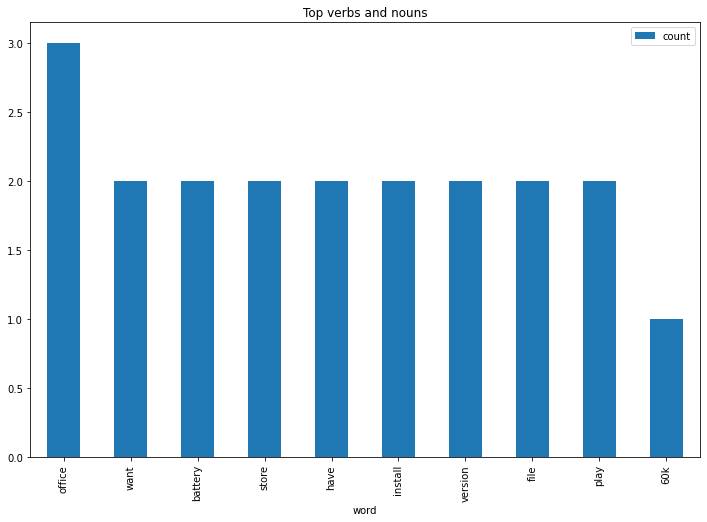

In [20]:
##Visualizing results
#Barchart for top 10 nouns + verbs
wf_df[0:10].plot.bar(x='word', figsize=(12,8), title='Top verbs and nouns')

#### Emotion Mining

In [21]:
#Sentiment analysis
afinn = pd.read_csv('Afinn.csv', sep=',', encoding='latin-1')
afinn.shape

(2477, 2)

In [22]:
afinn.head()

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [23]:
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(reviews))
sentences[5:15]

['), all printers are not compatible (e.g.',
 "the most economical MFD laser printer RICOH SP 111 can't be used), huge compatibility issues with Pages (MS Word) and Keynote (powerpoint) unless you master it by working on these (still mostly the document and slides either do not open in windows environment or have distortion issues).",
 'you need to spend extra for an external CD writer and tp buy a carry bag.',
 'Mac con not be connected to most of the projectors unless you buy some connectors, which are expensive and theres no clarity which one to buy and from where.',
 "you can't connect it to your TV, the ports are different and again theres no clarity - customer support, manuals or help section are silent !",
 'Marketing strategy for Indian market, if at all has been planned, has been very bad.',
 'If these critical issues (and a few more not mentioned here) are handled properly, the Mac can sweep away other laptops in India.',
 "Presently, it doesn't seem to be happening.Overall V

In [24]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df

,sentence
0,It's amazing..... battery last around 10 -12 h...
1,Got it in 50k in Diwali sale.
2,Technically good laptop.Good News.luxury produ...
3,Terrific sense of possession & pride.Bad News.
4,Problems will be there if you are switching fr...
...,...
182,You can get one of the best movie experiences ...
183,Overall I would it a 4.5/5.
184,"I got a great deal on this laptop, which I hav..."
185,I got it not only on discount but also was abl...


In [25]:
affinity_scores = afinn.set_index('word')['value'].to_dict()

In [26]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [27]:
# test that it works
calculate_sentiment(text = 'amazing')

4

In [28]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)

In [29]:
# how many words are in the sentence?
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df['word_count'].head(10)

0    17
1     7
2    31
3     7
4    65
5     7
6    47
7    16
8    29
9    26
Name: word_count, dtype: int64

In [30]:
sent_df.sort_values(by='sentiment_value').tail(10)

,sentence,sentiment_value,word_count
106,I am satisfied to get the marvel of a tech in ...,5,13
110,"The build is super strong, the operating syste...",5,10
45,Now my mac is perfectly fine : Got the Apple M...,5,27
46,Ships with macOS sierra but update is availabl...,6,86
64,I hope this comment can help to save somebody’...,6,10
103,The switch was inspired by the awesome reviews...,6,13
59,I use this for music production and it works a...,7,30
0,It's amazing..... battery last around 10 -12 h...,7,17
151,..So now I m working with the external keyboar...,17,113
86,"All are Gud.. For now.. Apple,apple,apple, tha...",24,184


In [31]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    187.000000
mean       0.930481
std        3.350571
min      -11.000000
25%        0.000000
50%        0.000000
75%        3.000000
max       24.000000
Name: sentiment_value, dtype: float64

In [32]:
# Sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0].head()

,sentence,sentiment_value,word_count
1,Got it in 50k in Diwali sale.,0,7
4,Problems will be there if you are switching fr...,-11,65
5,"), all printers are not compatible (e.g.",0,7
7,you need to spend extra for an external CD wri...,0,16
10,"Marketing strategy for Indian market, if at al...",-3,15


In [33]:
sent_df[sent_df['sentiment_value']>=20].head()

,sentence,sentiment_value,word_count
86,"All are Gud.. For now.. Apple,apple,apple, tha...",24,184


In [34]:
sent_df['index']=range(0,len(sent_df))

C:\Users\shash\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

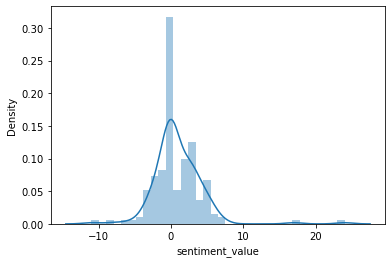

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(sent_df['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

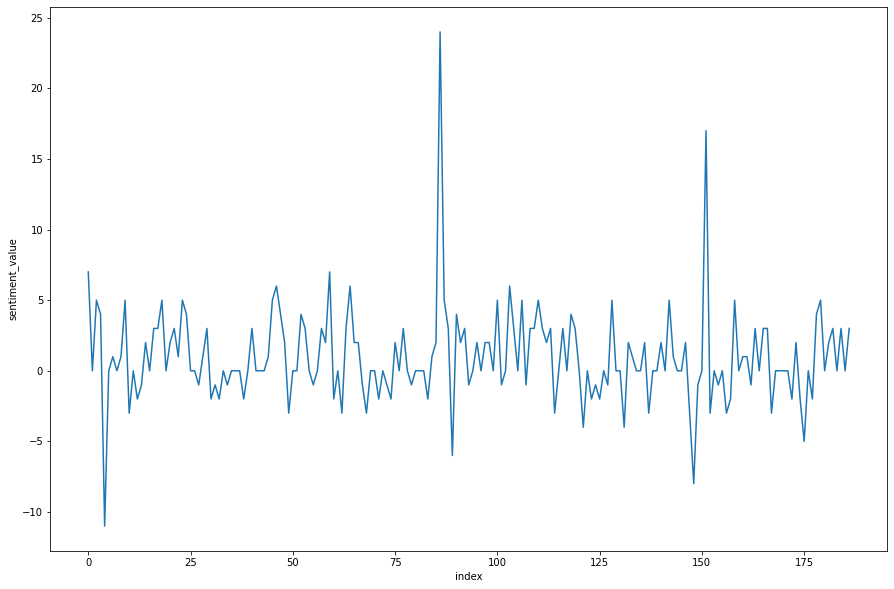

In [36]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

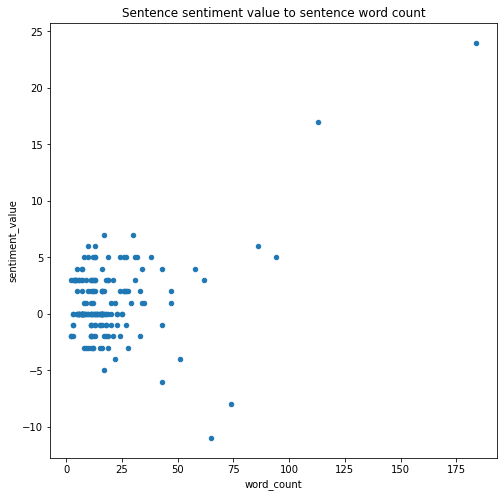

In [37]:
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')